In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Analysis and Exploration

The KDDCUP'99 dataset is widely used as one of the few publicly available datasets for network-based anomaly detection systems.


In [2]:
columns = ["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"]

df_train = pd.read_csv('./dataset/Train.txt', sep=',', names=columns)
df_test = pd.read_csv('./dataset/Test.txt', sep=',', names=columns)
df_train.shape

(125973, 43)

In [3]:
df_train.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
df_train.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

In [6]:
df_train[['land', 'urgent', 'numfailedlogins', 'numoutboundcmds']].describe()

,land,urgent,numfailedlogins,numoutboundcmds
count,125973.000000,125973.000000,125973.000000,125973.0
mean,0.000198,0.000111,0.001222,0.0
std,0.014086,0.014366,0.045239,0.0
min,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.0
max,1.000000,3.000000,5.000000,0.0


In [7]:
df_train.drop(['land', 'urgent', 'numfailedlogins', 'numoutboundcmds'], axis=1, inplace=True)
df_train.shape

(125973, 39)

In [8]:
df_train.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate   

In [9]:
df_train.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,neptune
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,neptune


In [10]:
df_train['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [11]:
# Convert 'attack' column to binary classification
df_train['attack'] = np.where(df_train['attack'] != "normal", "attack", "normal")

# Check unique values in the 'attack' column
df_train['attack'].unique()

array(['normal', 'attack'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
df_train['protocoltype'] = le.fit_transform(df_train['protocoltype'])
df_train['service'] = le.fit_transform(df_train['service'])
df_train['flag'] = le.fit_transform(df_train['flag'])
df_train['attack'] = le.fit_transform(df_train['attack'])

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 39 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  int32  
 2   service                 125973 non-null  int32  
 3   flag                    125973 non-null  int32  
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   wrongfragment           125973 non-null  int64  
 7   hot                     125973 non-null  int64  
 8   loggedin                125973 non-null  int64  
 9   numcompromised          125973 non-null  int64  
 10  rootshell               125973 non-null  int64  
 11  suattempted             125973 non-null  int64  
 12  numroot                 125973 non-null  int64  
 13  numfilecreations        125973 non-null  int64  
 14  numshells           

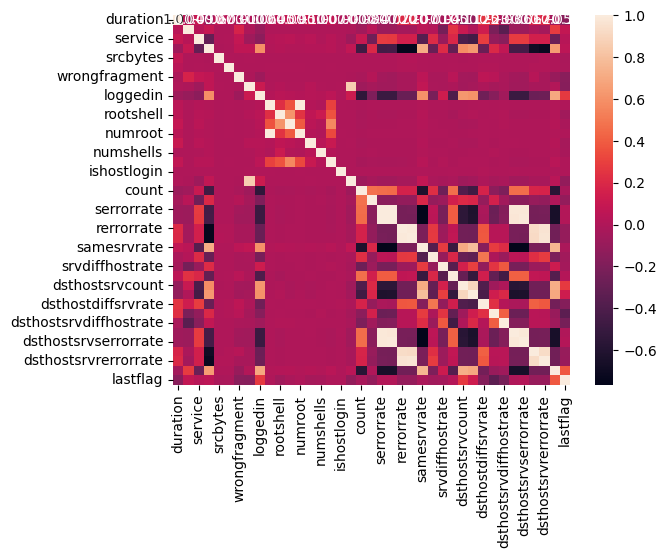

In [15]:
# Compute the correlation matrix
corr_matrix = df_train.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

# Show the plot
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
X = df_train.drop("attack", axis=1)
X_scaled = scaler.fit_transform(X)

In [18]:
y = df_train['attack']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)
X_train.shape

(94479, 38)

# Training Logistic Regression algorithm

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [21]:
lr.fit(X_train, y_train)

C:\Users\Yasin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
prediction = lr.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_test, prediction)

0.9761541880993205

In [24]:
precision_score(y_test, prediction)

0.9798016015298195

In [25]:
recall_score(y_test, prediction)

0.9754298292581355

## Saving model

In [26]:
import pickle

# Save the model
model_file = "anomaly_detector.pkl"
with open(model_file, "wb") as file:
    pickle.dump(lr, file)

# Save the scaler
scaler_file = "anomaly_scaler.pkl"
with open(scaler_file, "wb") as file:
    pickle.dump(X_scaled, file)

## Loading model

In [27]:
# Load the model
with open("anomaly_detector.pkl", "rb") as file:
    lr_loaded = pickle.load(file)

# Load the scaler
with open("anomaly_scaler.pkl", "rb") as file:
    X_scaled_loaded = pickle.load(file)

# predict
lr_loaded.predict(X_scaled_loaded)

array([1, 0, 0, ..., 1, 0, 1])

# Finding the best set of parameters - Hyperparameter optimization

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [30]:
lr = LogisticRegression(solver='liblinear')  # Add solver to handle 'l1' penalty
gs_cv = GridSearchCV(lr, param_grid, cv=5)
gs_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [31]:
gs_cv.best_params_

{'C': 100, 'penalty': 'l1'}

In [32]:
gs_cv.best_estimator_

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [33]:
gs_cv.best_estimator_ 

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [34]:
prediction_new = gs_cv.best_estimator_ .predict(X_test)

In [35]:
accuracy_score(y_test, prediction_new)

0.9784403378421287

In [36]:
precision_score(y_test, prediction_new)

0.983107703366479

In [37]:
recall_score(y_test, prediction_new)

0.9763817002796121